In [1]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import hook
from sklearn.preprocessing import MinMaxScaler

DIR1 = "/homes/hz009/Research/DExter/artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.25-cfdg_ddpm-w=1.2-dim=48"
DIR2 = "/homes/hz009/Research/DExter/artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac0.5-cfdg_ddpm-w=1.2-dim=48"
DIR3 = "/homes/hz009/Research/DExter/artifacts/samples/EVAL-targetgen_noise-lw11111-len200-beta0.02-steps1000-epsilon-TransferTrue-ssfrac1-cfdg_ddpm-w=1.2-dim=48"

dfs = []
for DIR in [DIR1, DIR3, DIR2]:
    all_paths = glob.glob(f"{DIR}/**/*midlevel.csv", recursive=True)
    label_paths = sorted([p for p in all_paths if 'label' in p])
    source_paths = sorted([p for p in all_paths if 'source' in p])
    pred_paths =  sorted([p for p in all_paths if (not 'label' in p) and (not 'source' in p)])

    label_feats = pd.concat([pd.read_csv(p, index_col=0) for p in label_paths])
    source_feats = pd.concat([pd.read_csv(p, index_col=0) for p in source_paths])
    pred_feats = pd.concat([pd.read_csv(p, index_col=0) for p in pred_paths])

    label_feats['type'] = 'label'
    source_feats['type'] = 'source'
    pred_feats['type'] = 'pred'

    df = pd.concat([label_feats, source_feats, pred_feats])


    # # Select the columns to normalize
    # columns_to_normalize = ['melodiousness', 'articulation', 'rhythm_complexity', 'rhythm_stability', 'dissonance', 'tonal_stability', 'minorness']
    # # Create an instance of MinMaxScaler
    # scaler = MinMaxScaler(feature_range=(-1, 1))
    # # Normalize the selected columns
    # df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

    df = df.melt(id_vars=['type'], value_vars=['melodiousness', 'articulation', 'rhythm_complexity', 'rhythm_stability', 'dissonance', 'tonal_stability', 'minorness'])
    dfs.append(df)




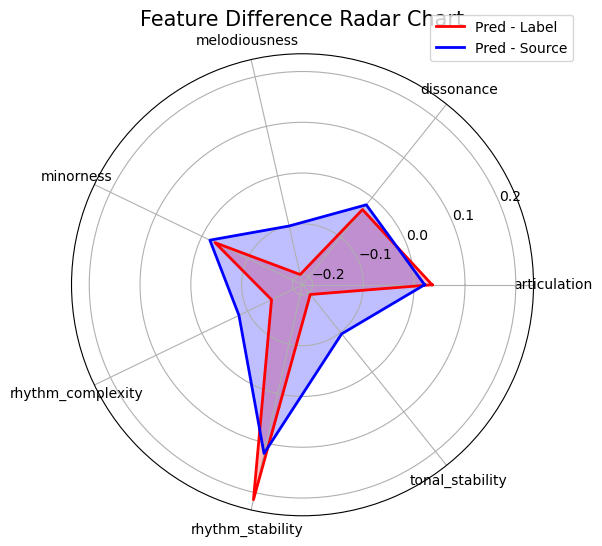

In [7]:
import numpy as np
# Calculate the mean values for each type and variable
mean_values = df.groupby(['type', 'variable']).value.mean().unstack(0)

# Calculate the differences
mean_values['pred_label_diff'] = mean_values['pred'] - mean_values['label']
mean_values['pred_source_diff'] = mean_values['pred'] - mean_values['source']

# Prepare data for the radar chart
features = mean_values.index
num_features = len(features)

# Angle of each axis in the plot (divide the full circle into equal parts)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Radar chart data
data_pred_label = mean_values['pred_label_diff'].tolist()
data_pred_source = mean_values['pred_source_diff'].tolist()
data_pred_label += data_pred_label[:1]  # Complete the loop
data_pred_source += data_pred_source[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one line per variable + fill
ax.plot(angles, data_pred_label, color='red', linewidth=2, label='Pred - Label')
ax.fill(angles, data_pred_label, color='red', alpha=0.25)
ax.plot(angles, data_pred_source, color='blue', linewidth=2, label='Pred - Source')
ax.fill(angles, data_pred_source, color='blue', alpha=0.25)

# Add feature names as labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Add a title, legend, and make sure the plot is circular by setting the aspect ratio
ax.set_title('Feature Difference Radar Chart', size=15, color='black', position=(0.5, 1.1))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

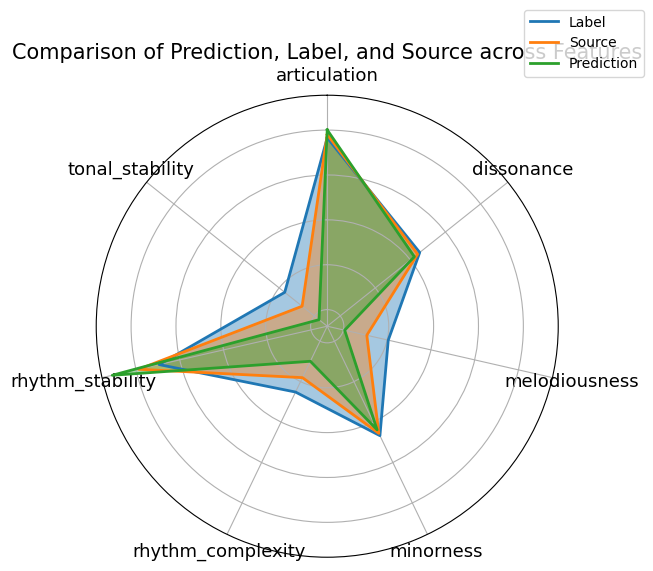

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Continuing from the previously calculated mean_values DataFrame
# Assume mean_values is already calculated and has the structure: features as index, and 'pred', 'label', 'source' as columns

# Extract values for each group
values_label = mean_values['label'].tolist()
values_source = mean_values['source'].tolist()
values_pred = mean_values['pred'].tolist()

# Complete the loop for each group
values_label += values_label[:1]
values_source += values_source[:1]
values_pred += values_pred[:1]

# Setting up the radar chart
features = list(mean_values.index)
num_features = len(features)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # Completing the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each group
ax.plot(angles, values_label, linewidth=2, linestyle='solid', label='Label')
ax.fill(angles, values_label, alpha=0.4)
ax.plot(angles, values_source, linewidth=2, linestyle='solid', label='Source')
ax.fill(angles, values_source, alpha=0.4)
ax.plot(angles, values_pred, linewidth=2, linestyle='solid', label='Prediction')
ax.fill(angles, values_pred, alpha=0.4)

# Improve aesthetics for polygon-like appearance
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Set the radar to have a more 'polygon' appearance by adjusting the xticks and yticks
ax.set_yticklabels([])
ax.set_xticklabels(features, fontsize=13)

# Add title and legend
ax.set_title('Comparison of Prediction, Label, and Source across Features', size=15, position=(0.5, 1.1), color='black')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

plt.show()


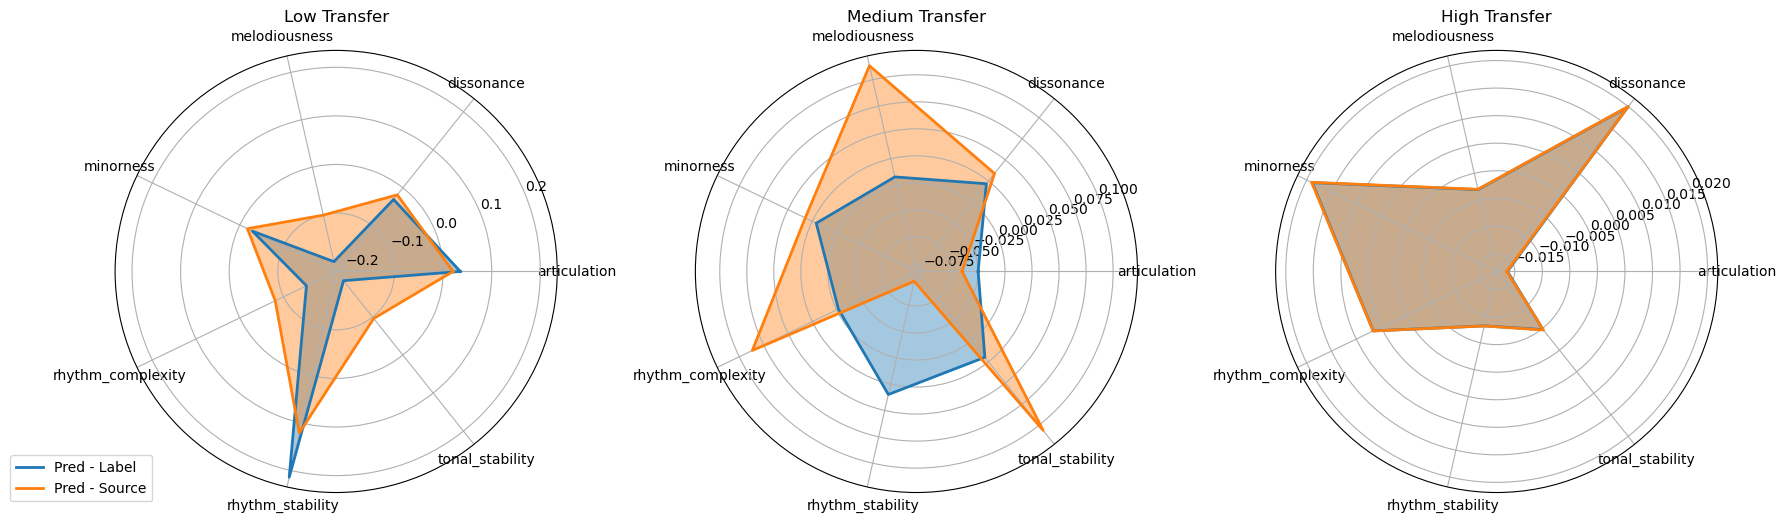

In [20]:

# Assuming df1, df2, df3 are your DataFrames for the three transfer degrees
titles = ['frac=0.25', 'frac=0.5', 'frac=0.75']  # Example titles

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))

for ax, df, title in zip(axs, dfs, titles):
    # Calculate mean values for each type and variable
    mean_values = df.pivot_table(index='variable', columns='type', values='value', aggfunc=np.mean)
    
    # Calculate differences
    mean_values['pred_label_diff'] = mean_values['pred'] - mean_values['label']
    mean_values['pred_source_diff'] = mean_values['pred'] - mean_values['source']
    
    # Extract values for plotting
    values_pred_label = mean_values['pred_label_diff'].tolist()
    values_pred_source = mean_values['pred_source_diff'].tolist()
    
    # Complete the loop for each dataset
    values_pred_label += values_pred_label[:1]
    values_pred_source += values_pred_source[:1]
    
    # Setting up the radar chart
    features = list(mean_values.index)
    num_features = len(features)
    
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]  # Completing the loop
    
    # Plot
    ax.plot(angles, values_pred_label, linewidth=2, linestyle='solid', label='Pred - Label')
    ax.fill(angles, values_pred_label, alpha=0.4)
    ax.plot(angles, values_pred_source, linewidth=2, linestyle='solid', label='Pred - Source')
    ax.fill(angles, values_pred_source, alpha=0.4)
    
    # Improve aesthetics
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_title(title)
    
# Add a legend in the first plot or outside
axs[0].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()  # Adjust the layout to make room for the plot titles
plt.show()


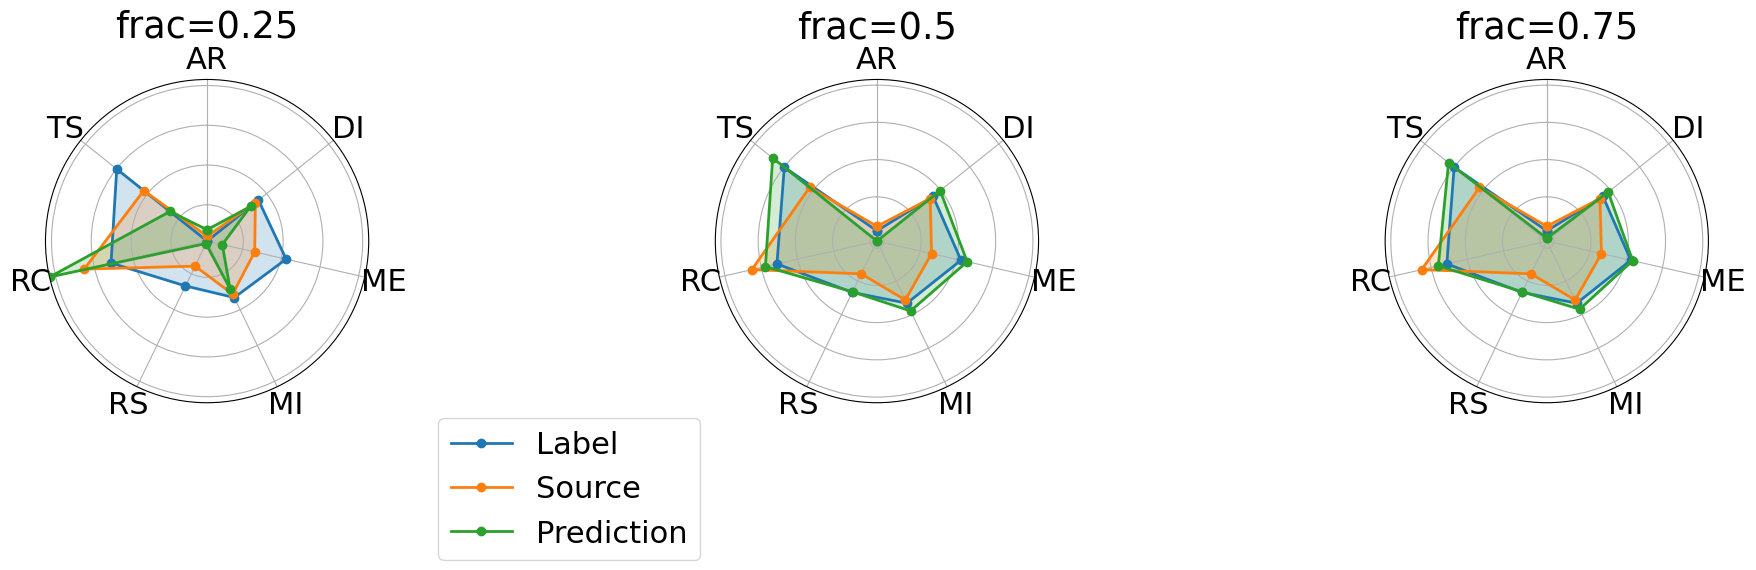

In [5]:

# Assuming df1, df2, df3 are your DataFrames for the three transfer degrees
titles = ['frac=0.25', 'frac=0.5', 'frac=0.75']  # Example titles

fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
# Set the font size for all text in the plot
plt.rcParams.update({'font.size': 22})  # Adjust the font size as needed


global_min = float('inf')
global_max = float('-inf')
for ax, df, title in zip(axs, dfs, titles):
    # Calculate mean values for each type and variable
    mean_values = df.pivot_table(index='variable', columns='type', values='value', aggfunc=np.mean)
    
    # Extract values for each group
    values_label = mean_values['label'].tolist()
    values_source = mean_values['source'].tolist()
    values_pred = mean_values['pred'].tolist()

    local_min = min(mean_values['label'].min(), mean_values['source'].min(), mean_values['pred'].min())
    local_max = max(mean_values['label'].max(), mean_values['source'].max(), mean_values['pred'].max())
    global_min = min(global_min, local_min)
    global_max = max(global_max, local_max)

    # Complete the loop for each group
    values_label += values_label[:1]
    values_source += values_source[:1]
    values_pred += values_pred[:1]

    # Setting up the radar chart
    features = list(mean_values.index)
    num_features = len(features)

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]  # Completing the loop

    # Plot each group
    ax.plot(angles, values_label, linewidth=2, linestyle='-', label='Label', marker='o')
    ax.fill(angles, values_label, alpha=0.2)
    ax.plot(angles, values_source, linewidth=2, linestyle='solid', label='Source', marker='o')
    ax.fill(angles, values_source, alpha=0.2)
    ax.plot(angles, values_pred, linewidth=2, linestyle='solid', label='Prediction', marker='o')
    ax.fill(angles, values_pred, alpha=0.2)

    # Improve aesthetics for polygon-like appearance
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['AR', 'DI', 'ME', 'MI', 'RS', 'RC', 'TS'], fontsize=22)
    ax.set_yticklabels([])
    
    # Set the same scale for all plots
    ax.set_ylim(global_min, global_max)
    ax.set_title(title)

# Add a legend in the first plot or outside
axs[1].legend(loc='best',
                bbox_to_anchor=(0, 0),
                # change text to ['Target', 'Source', 'Output']
                labels=['Target', 'Source', 'Output']
                )

plt.tight_layout()  # Adjust the layout to make room for the plot titles
plt.show()


In [48]:
df = dfs[2]

# Calculate mean values for each type and variable
mean_values = df.pivot_table(index='variable', columns='type', values='value', aggfunc=np.mean)

# Calculate differences
mean_values['pred_label_diff'] = mean_values['pred'] - mean_values['label']
mean_values['pred_source_diff'] = mean_values['pred'] - mean_values['source']

# Extract values for plotting
values_pred_label = mean_values['pred_label_diff'].tolist()
values_pred_source = mean_values['pred_source_diff'].tolist()


In [18]:
mean_values

type,label,pred,source,pred_label_diff,pred_source_diff
variable,,,,,
articulation,0.078740,0.062410,0.078868,-0.016330,-0.016457
dissonance,0.037827,0.057741,0.037723,0.019914,0.020017
melodiousness,-0.366975,-0.370016,-0.367028,-0.003041,-0.002988
minorness,0.107661,0.126539,0.107535,0.018878,0.019004
rhythm_complexity,-0.130186,-0.123595,-0.130205,0.006591,0.006610
rhythm_stability,0.219169,0.211017,0.219151,-0.008152,-0.008134
tonal_stability,-0.494871,-0.499649,-0.494964,-0.004778,-0.004685
